# Customer Segmentation using OPTICS Clustering

In this notebook, we perform customer segmentation using the OPTICS clustering algorithm. We will preprocess the data, visualize the correlation matrix, and evaluate the clustering results using the silhouette score.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

## Loading the dataset

In [2]:
# Loading the dataset
file_path = r'C:\Users\Core i7\Downloads\1632560262896716.csv'  # Adjust the file path if needed
data = pd.read_csv(file_path)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Generating and visualizing the correlation matrix

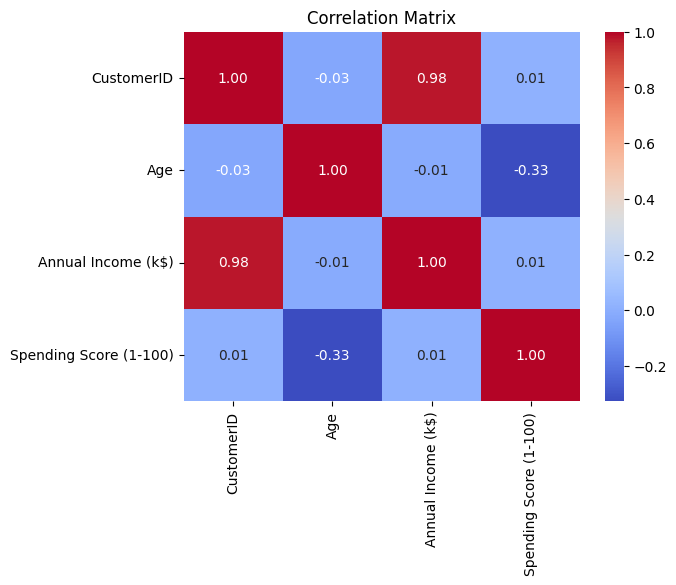

In [3]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Selecting the features with the lowest correlation to 'Annual Income (k$)'

In [4]:
# Selecting features
best_features = correlation_matrix['Annual Income (k$)'].abs().sort_values(ascending=True).index[1:3]
print(f"Selected Features: {best_features}")

Selected Features: Index(['Age', 'CustomerID'], dtype='object')


## Preprocessing the data

In [5]:
# Encoding the 'Gender' column
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Selecting relevant features for clustering
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

## Standardizing the features

In [6]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Plotting the Dendrogram

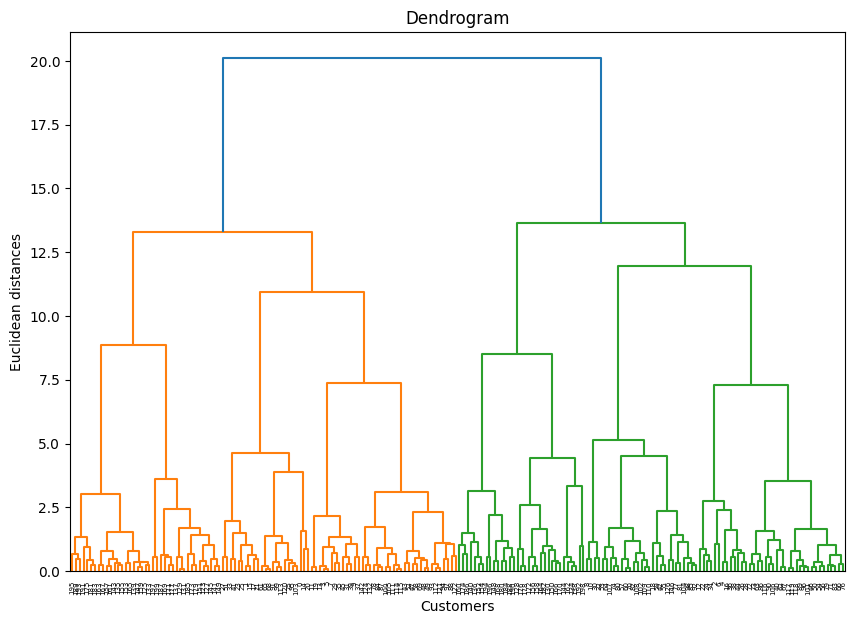

In [7]:
# Dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Performing OPTICS Clustering

In [8]:
# OPTICS clustering
optics = OPTICS(min_samples=5, eps=0.5)
y_optics = optics.fit_predict(X_scaled)

# Adding cluster results to dataset
data['Cluster'] = y_optics
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,-1
1,2,0,21,15,81,0
2,3,1,20,16,6,-1
3,4,1,23,16,77,7
4,5,1,31,17,40,-1


## Calculating Silhouette Score (excluding noise points)

In [9]:
# Filtering noise points for silhouette score
filtered_data = X_scaled[y_optics != -1]
filtered_labels = y_optics[y_optics != -1]

# Calculating silhouette score
if len(set(filtered_labels)) > 1:
    silhouette_avg = silhouette_score(filtered_data, filtered_labels)
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Not enough clusters for Silhouette Score")

Silhouette Score: 0.6001022310405214


## Counting clusters and data points

In [10]:
# Number of clusters
num_clusters = len(set(y_optics)) - (1 if -1 in y_optics else 0)
print(f'Number of clusters (excluding noise): {num_clusters}')
print(data['Cluster'].value_counts())

Number of clusters (excluding noise): 11
-1     107
 10     12
 4      11
 1      10
 2      10
 7       9
 5       9
 0       8
 9       7
 3       7
 6       5
 8       5
Name: Cluster, dtype: int64


## Visualizing clusters

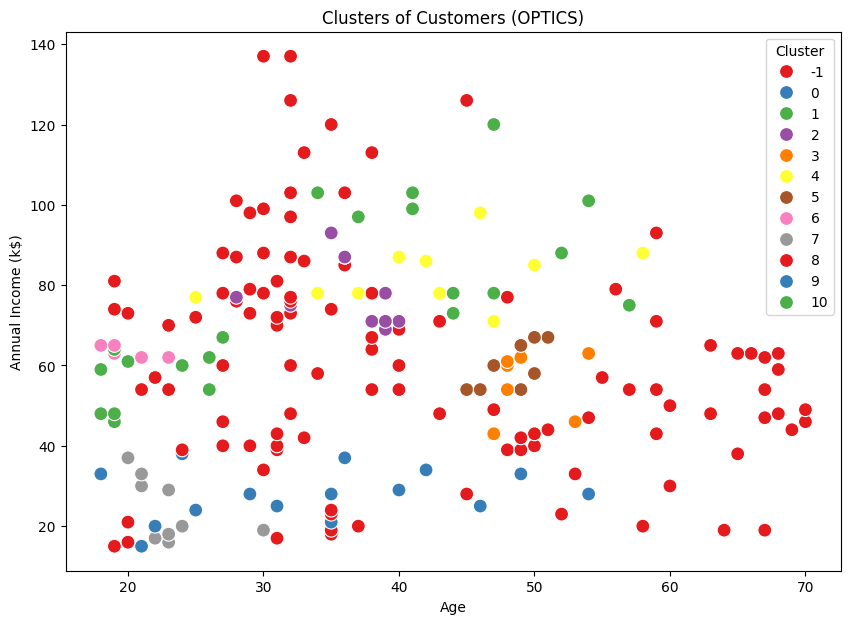

In [11]:
# Scatter plot of clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Clusters of Customers (OPTICS)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster')
plt.show()

## Saving the clustered data

In [12]:
# Save the results
output_file = 'customer_segments_with_clusters_optics.csv'
data.to_csv(output_file, index=False)
print(f'Results saved to {output_file}')

Results saved to customer_segments_with_clusters_optics.csv


### Author

Mostafa Haji Shafiei